## Load Data

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/processed/mushrooms_pca.csv')
y = df['class']
X = df.drop(columns=['class']).values
X.view()

array([[ 0.24373845,  0.16963259,  0.18727096, ..., -0.2621439 ,
        -0.04811481,  0.10087257],
       [ 1.5713711 , -0.39656834,  0.45390158, ..., -0.11453773,
         0.41043087, -0.28486641],
       [ 0.01171017,  0.71284725, -0.7501287 , ...,  0.00313137,
        -0.25922659, -0.06733154],
       ...,
       [-0.89697748, -0.1697835 ,  0.3055329 , ...,  0.53583814,
         0.06813399, -0.06614521],
       [-1.88993255, -0.39236622, -0.58529202, ...,  0.1682014 ,
         0.37251319, -0.41726506],
       [ 0.66668421,  0.4509778 , -0.09989701, ..., -0.18299176,
        -0.0747118 , -0.36911983]])

## Random Search

In [10]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [100, 200, 300]
# Maximum number of levels in tree
max_depth = [40,50,60]
# Minimum number of samples required to split a node
min_samples_split = [10,15,20]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
random_grid

{'n_estimators': [100, 200, 300],
 'max_depth': [40, 50, 60],
 'min_samples_split': [10, 15, 20]}

In [11]:
# define a RF estimator
rf = RandomForestClassifier()

# set up randomized search with cross-validation
rf_random = GridSearchCV(estimator = rf, 
                               param_grid = random_grid, 
                               cv = 3, 
                               verbose=20, 
                               scoring='f1',
                               n_jobs = -1)

# fit on the data
rf_random.fit(X, y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'max_depth': [40, 50, 60], 'min_samples_split': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=20)

In [12]:
print(rf_random.best_estimator_)
print(rf_random.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7837713758756999


In [13]:
import pickle
pickle.dump(rf_random, open( "../models/rf-high-res.p", "wb" ) )

In [17]:
results = pd.DataFrame(rf_random.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.699845,0.125976,0.092308,0.008914,40,10,100,"{'max_depth': 40, 'min_samples_split': 10, 'n_...",0.715412,0.807209,0.803010,0.775199,0.042323,25,0.999617,0.999808,0.999617,0.999681,0.000090
1,15.327662,0.176526,0.203308,0.004129,40,10,200,"{'max_depth': 40, 'min_samples_split': 10, 'n_...",0.719052,0.811448,0.807956,0.779474,0.042761,13,1.000000,1.000000,1.000000,1.000000,0.000000
2,23.064371,0.149499,0.265390,0.017374,40,10,300,"{'max_depth': 40, 'min_samples_split': 10, 'n_...",0.718558,0.816842,0.805574,0.780314,0.043922,8,0.999617,1.000000,1.000000,0.999872,0.000181
3,7.620035,0.087481,0.106851,0.022271,40,15,100,"{'max_depth': 40, 'min_samples_split': 15, 'n_...",0.706813,0.810857,0.800684,0.772773,0.046838,27,0.997889,0.999043,0.999042,0.998658,0.000544
4,15.458009,0.161632,0.207501,0.027736,40,15,200,"{'max_depth': 40, 'min_samples_split': 15, 'n_...",0.723423,0.810469,0.806297,0.780053,0.040090,10,0.998658,0.998659,0.999233,0.998850,0.000271


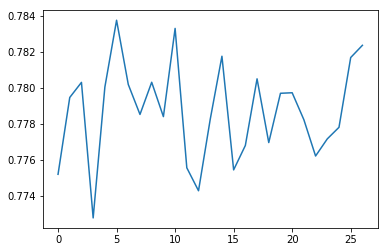

In [18]:
plt.plot(results['mean_test_score'])

--------------

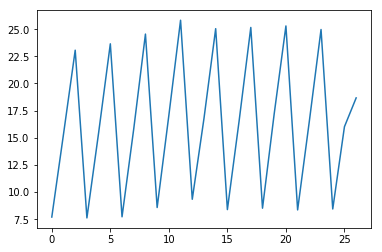

In [19]:
plt.plot(results['mean_fit_time'])

In [35]:
lines = []
for _,r in results.iterrows():
    line = r['params']
    line['time'] = r['mean_fit_time']
    line['score'] = r['mean_test_score']
    lines.append(line)
params_time = pd.DataFrame(lines)
params_time.head(40)

,bootstrap,max_depth,min_samples_split,n_estimators,score,time
0,True,10.0,2,10,-0.627289,4.238155
1,True,10.0,2,50,-0.584032,21.864062
2,True,10.0,2,100,-0.548177,46.632964
3,True,10.0,5,10,-0.652373,4.215128
4,True,10.0,5,50,-0.567332,23.410655
5,True,10.0,5,100,-0.558412,50.128244
6,True,10.0,10,10,-0.670660,5.319769
7,True,10.0,10,50,-0.576724,25.553442
8,True,10.0,10,100,-0.542654,52.849581
9,True,50.0,2,10,-0.628406,8.876620


In [39]:
btrue = params_time[params_time['bootstrap'] == True]
print(btrue.groupby(['max_depth'])['score'].mean())
print(btrue.groupby(['min_samples_split'])['score'].mean())
print(btrue.groupby(['n_estimators'])['score'].mean())

max_depth
10.0    -0.591961
50.0    -0.542059
100.0   -0.550178
Name: score, dtype: float64
min_samples_split
2    -0.567002
5    -0.557997
10   -0.555188
Name: score, dtype: float64
n_estimators
10    -0.625875
50    -0.534197
100   -0.520114
Name: score, dtype: float64
